In [2]:
import os
import numpy as np
import network
import convert
import torch
from simulation import (
    CompressionSimulation,
    LJSimulation,
    TemperatureRange,
    gen_sim_data,
)
import networkx as nx
import matplotlib.pyplot as plt
import random
from utils import draw_network, recalc_bond, recalc_bonds, inject_noise

calc_dir = "/home/sergey/work/simulator_data_gen/test_networks" # work

In [3]:
def draw_network(
    net: network.Network,
    edges: bool = True,
    periodic_edges: bool = True,
    box: bool = False,
    node_color: str = "skyblue",
    standalone: bool = True,
    node_size: float = 20,
    figure_scale: float = 3,
):
    if standalone:
        plt.figure(figsize=(8, 8))
    G = nx.Graph()
    # Add nodes
    for atom in net.atoms:
        G.add_node(atom.atom_id)

    pos = {atom.atom_id: (float(atom.y), float(atom.x)) for atom in net.atoms}

    # Add edges
    if edges:
        edge_index = [(bond.atom1.atom_id, bond.atom2.atom_id) for bond in net.bonds]
        naive_edge_lengths = [bond.atom1.dist(bond.atom2) for bond in net.bonds]
        for edge, length in zip(edge_index, naive_edge_lengths):
            if periodic_edges:
                G.add_edge(edge[0], edge[1])
            else:
                if length < net.box.x // 2:
                    G.add_edge(edge[0], edge[1])

    if box:
        B = nx.Graph()
        box_corners = [
            (net.box.x1, net.box.y1),
            (net.box.x1, net.box.y2),
            (net.box.x2, net.box.y1),
            (net.box.x2, net.box.y2),
        ]
        box_edges = [
            [box_corners[0], box_corners[1]],
            [box_corners[1], box_corners[2]],
            [box_corners[2], box_corners[3]],
            [box_corners[3], box_corners[0]],
        ]

        for corner, edge in zip(box_corners, box_edges):
            B.add_node(corner)
            B.add_edge(edge[0], edge[1])
        b_pos = {}
        b_pos[box_corners[0]] = (net.box.x1, net.box.y2)
        b_pos[box_corners[1]] = (net.box.x2, net.box.y2)
        b_pos[box_corners[2]] = (net.box.x2, net.box.y1)
        b_pos[box_corners[3]] = (net.box.x1, net.box.y1)

        nx.draw_networkx(B, b_pos, with_labels=False, node_color="black", node_size=1)

    nx.draw_networkx(
        G,
        pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        font_size=10,
    )
    # nx.draw_networkx(G, with_labels=False, node_color=node_color, node_size=node_size, font_size=10)
    if standalone:
        plt.show()



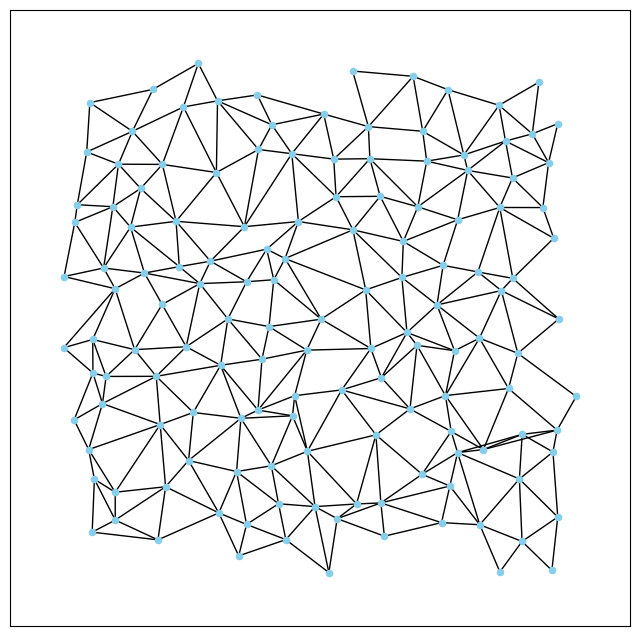

In [5]:
example = network.Network.from_data_file("data/raw/noised_prund/140_4/network_data/2/network.lmp")
draw_network(example, periodic_edges=False)

In [9]:
from utils import load_data


data = load_data('noisy_networks.pt')